In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [252]:
dataset = pd.read_csv("Mall_Customers.csv")

In [253]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [254]:
X = dataset.iloc[:,[3,4]].values

In [255]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [256]:
import hdbscan
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import davies_bouldin_score

In [257]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=5,
                       cluster_std=0.6, random_state=42)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,
                            min_samples=5,
                            cluster_selection_method='eom',
                            allow_single_cluster=True,
                            metric='euclidean',
                            algorithm='best',
                            leaf_size=10)

In [258]:
# Fit the model to the data
clusterer.fit(X)

HDBSCAN(allow_single_cluster=True, leaf_size=10, min_samples=5)

In [259]:
# Evaluate clustering
labels = clusterer.labels_
silhouette_avg = silhouette_score(X, labels)
ari = adjusted_rand_score(y_true, labels)
db_index = davies_bouldin_score(X, labels)
# Evaluation metrics
print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))
print("Adjusted Rand Index: {:.2f}".format(ari))
print("Davies-Bouldin Index: {:.2f}".format(db_index))

Silhouette Coefficient: 0.75
Adjusted Rand Index: 0.97
Davies-Bouldin Index: 1.01


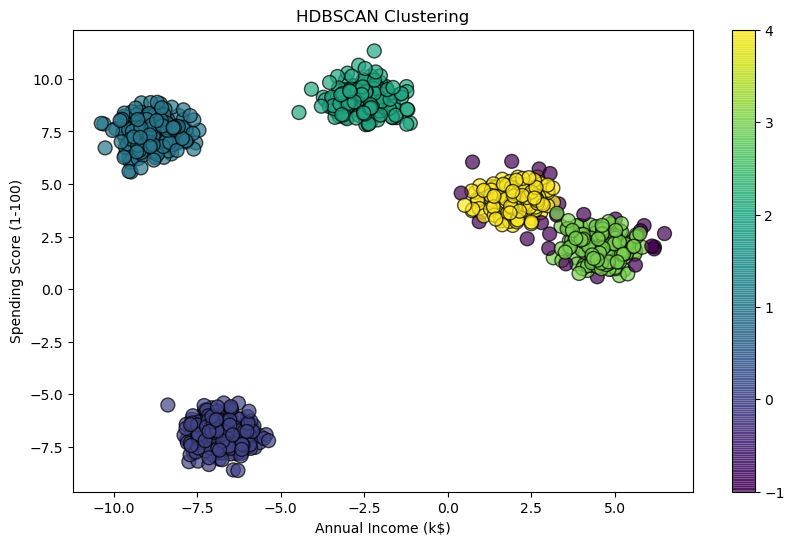

In [260]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusterer.labels_,
            cmap='viridis', s=100, alpha=0.7, edgecolors='k')
plt.colorbar()
plt.title('HDBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()